# Regressão Logística para Análise de Crédito

## Introdução

O problema de análise de crédito é frequentemente resolvido utilizando regressão logística, uma vez que órgãos reguladores podem auditar o sistema de decisão para concessão de crédito afim de se evitar abusos.
O método de regressão logística, por se tratar de um modelo linear, é capaz de retornar os pesos dados a cada caracterísica dos clientes.

Nesse contexto, existem algumas bases públicas para criação de modelos de análise de crédito, entre elas, existe a [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit/data), que fez parte de uma competição do Kaggle a alguns anos.


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn import datasets  
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import (classification_report, accuracy_score, roc_curve, roc_auc_score)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


from custom_plot import *

In [46]:
# Importando dados, excluindos as linhas que contem Na e coluna sem informação útil
X = pd.read_csv('GiveMeSomeCredit/cs-training.csv')
X.dropna(axis=0, inplace=True)
X.drop(['Unnamed: 0'], axis=1, inplace=True)
X.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [47]:
# Passando os dados de resposta para y e excluindo-os das features de treino
y = X.SeriousDlqin2yrs
X.drop(['SeriousDlqin2yrs'], axis=1, inplace=True)
# Separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
# Regressão logística - Treino
logit_clf = LogisticRegression(random_state=0, max_iter=500)
logit_clf.fit(X_train, y_train)
# Regressão logística - Teste
y_pred = logit_clf.predict(X_test)
# Avaliando resultados do teste
target_names = ["0","1"]
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names))

C:\Users\Gustavo\Anaconda31\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.9294919763864637
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     22339
           1       0.71      0.02      0.04      1715

    accuracy                           0.93     24054
   macro avg       0.82      0.51      0.50     24054
weighted avg       0.91      0.93      0.90     24054



In [ ]:
# Podemos observar que a taxa de recall é bastante alta para a classe 0, ou seja, todos os dados da classe 0 foram 
# previstos corretamente, indicando que não existem casos de falsos positivo.
# Entretando os resultados para a classe 1 indicam um valor médio de precisao para a classe 1, acertando 71% das 
# vezes que previu a classe porém de todos os registros da classe 1, foram previstos apenas 0,02%

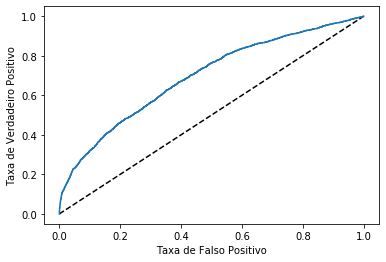

In [49]:
# Plotando a curva ROC
y_proba = logit_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Regressão Logística')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.show;

In [50]:
# Calculando a área da curva ROC
roc_auc_score(y_test, y_proba)

0.6938974667713005

In [52]:
# Validação cruzada
logit_clf_cv = LogisticRegressionCV(random_state=0, max_iter=1000, cv=5)
logit_clf_cv.fit(X_train, y_train)

y_pred = logit_clf_cv.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names))

Accuracy: 0.929367257005072
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     22339
           1       0.74      0.01      0.03      1715

    accuracy                           0.93     24054
   macro avg       0.83      0.51      0.50     24054
weighted avg       0.92      0.93      0.90     24054



In [ ]:
# Podemos observar que após a validação cruzada os resultados para a classe 0 foram os parecidos.
# Já os resultados para a classe 1 indicam um aumento na taxa de acerto das predições dessa classe, mesmo assim
# a proporção de falsos negativos ainda é grande.

In [8]:
# Exibindo o inverso da regularização, quanto menor o valor, maior o nível de regularização dos dados.
print('Inverso da Regularização:')
print(logit_clf_cv.Cs_)
# Exibindo scores aferidos na validação cruzada.
print('Scores:')
print(logit_clf_cv.scores_[1])

Inverso da Regularização:
[1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]
Scores:
[[0.93026398 0.93026398 0.93026398 0.93026398 0.93026398 0.93026398
  0.93026398 0.93026398 0.93026398 0.93026398]
 [0.93031232 0.93031232 0.93031232 0.93031232 0.93031232 0.93031232
  0.93031232 0.93031232 0.93031232 0.93031232]
 [0.92968872 0.92968872 0.92968872 0.92968872 0.92968872 0.92968872
  0.92968872 0.92968872 0.92968872 0.92968872]
 [0.93010445 0.93015642 0.93015642 0.93015642 0.93015642 0.93015642
  0.93015642 0.93015642 0.93015642 0.93015642]
 [0.93041264 0.93041264 0.93041264 0.93041264 0.93041264 0.93041264
  0.93041264 0.93041264 0.93041264 0.93041264]]


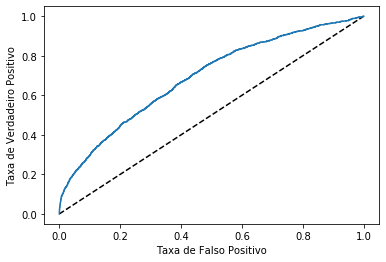

In [53]:
# Plotando a curva ROC da validação cruzada.
y_proba = logit_clf_cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Regressão Logística')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.show;

In [54]:
# Calculando a área da curva ROC apartir dos resultados da validação cruzada.
roc_auc_score(y_test, y_proba)

0.6895093716919919

In [ ]:
# Conclusão:
# Apesar do f1 score estar baixo para a classe 1, para o nosso problema de análise de credito as métricas 
# de maior importância são:
# Verdadeiros positivo onde se preve que a análise deve ser aprovada e ela é prevista como aprovada(74%); 
# Verdadeiros negativos,ou seja, das análises que deveriam ser reprovadas, quantas realmente foram 
# reprovadas(100%).
# Apesar do modelo reprovar todas as análises que devem ser "reprovadas" ainda existe uma proporção considerável
# de análises que foram aprovadas mas não deveriam ter sido e também as análises que deveriam ser aprovadas
# mas não foram.